# 1D Steady Aquifer Flow
This notebook demonstrates steady state boundary value solutions for 1D aquifer flow using the `Steady1dConfFlow` and `Steady1dUnconfFlow` classes.

Installed `PyGAF` testing.

In [ ]:
import os
import pygaf
%matplotlib inline

Local testing.

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../pygaf'))
import pygaf

## Confined Flow
The default `Steady1dConfFlow` object uses the default `Aq1dFiniteConf` aquifer class, default `SteadyBC` type 2 boundary condition class at x=0 and default `SteadyBC` type 1 boundary condition class at x=L.

Create a default steady state, 1D confined aquifer flow solution and display the default solution information.

In [2]:
S1 = pygaf.Steady1dConfFlow()
S1.info()

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, confined homogeneous aquifer
Boundary value solution for flow equation T.d2h/dx2 + R = 0
BC at x=0: type 2, {'flow': 0.0}
BC at x=L: type 1, {'head': 10.0}
Recharge rate: 0.0 [L/T]



Use the `.info` methods of the boundary and aquifer objects.

In [3]:
S1.bc0.info()
S1.bcL.info()
S1.aq.info()

BOUNDARY CONDITION INFORMATION
------------------------------
BC type 2, {'flow': 0.0}

BOUNDARY CONDITION INFORMATION
------------------------------
BC type 1, {'head': 10.0}

AQUIFER INFORMATION
-------------------
Type: 1D, finite, confined homogeneous aquifer
Name: Aq1dFiniteConf class
Hydraulic conductivity: 1 [L/T]
Specific storativity: 0.0001 [1/L]
Thickness: 10 [L]
Length: 1000 [L]
Transmissivity: 10 [L2/T]
Storage coefficient: 0.001 [1]
Diffusivity: 10000.0 [L2/T]
Bottom elevation: 0 [RL]
Top elevation: 10 [RL]



Draw the aquifer.

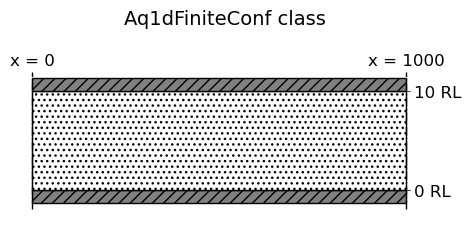

In [4]:
S1.aq.draw()

Calculate the solutions for head, flow and hydraulic gradient using the `.h`, `.q` and `.h_grad` methods
- Plots are drawn as default but can be suppressed using the plot argument (e.g., `.h(plot=False)`)
- Results can be exported to csv or xlsx by setting these arguments to a file name (e.g., `.h(csv='fname'`) or `.h(xlsx='fname'`). If neither of these arguments are given then result are not exported.

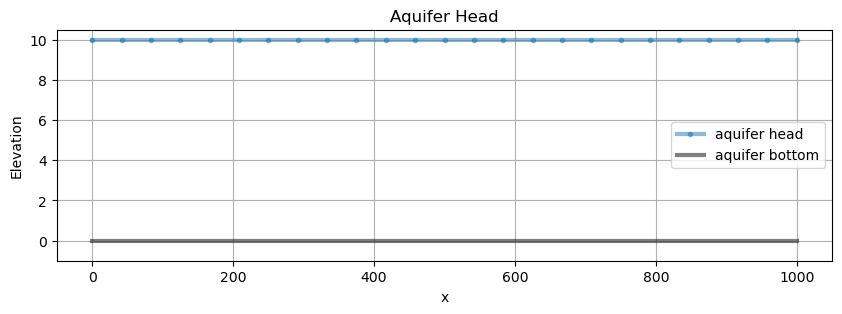

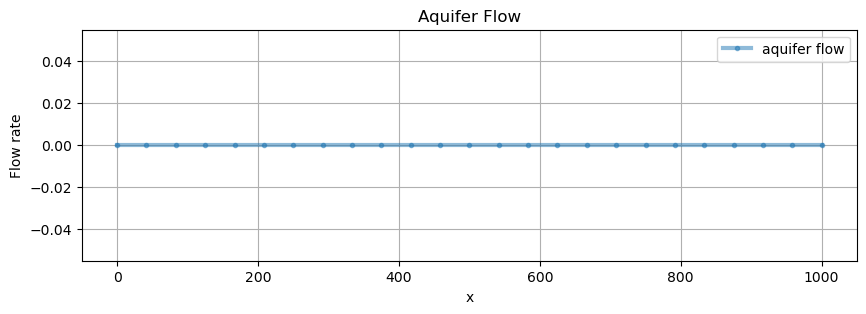

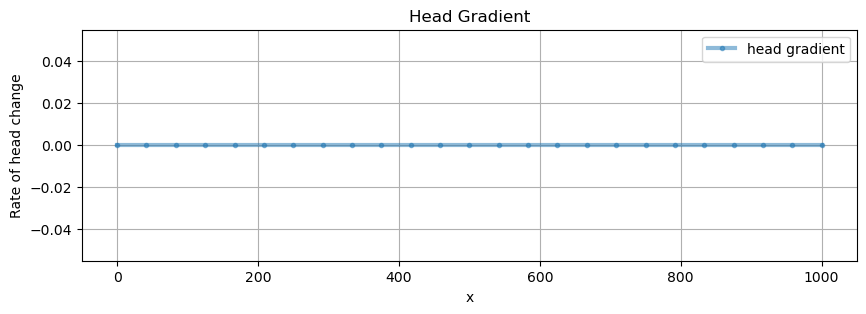

In [5]:
dum = S1.h()
dum = S1.q()
dum = S1.h_grad()

### Solution for no-flow at x=0, head at x=L and uniform recharge

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, confined homogeneous aquifer
Boundary value solution for flow equation T.d2h/dx2 + R = 0
BC at x=0: type 2, {'flow': 0.0}
BC at x=L: type 1, {'head': 10.0}
Recharge rate: 0.0001 [L/T]

AQUIFER INFORMATION
-------------------
Type: 1D, finite, confined homogeneous aquifer
Name: Aq1dFiniteConf class
Hydraulic conductivity: 1.5 [L/T]
Specific storativity: 0.0001 [1/L]
Thickness: 10 [L]
Length: 1000 [L]
Transmissivity: 15.0 [L2/T]
Storage coefficient: 0.001 [1]
Diffusivity: 15000.0 [L2/T]
Bottom elevation: -2.0 [RL]
Top elevation: 8.0 [RL]



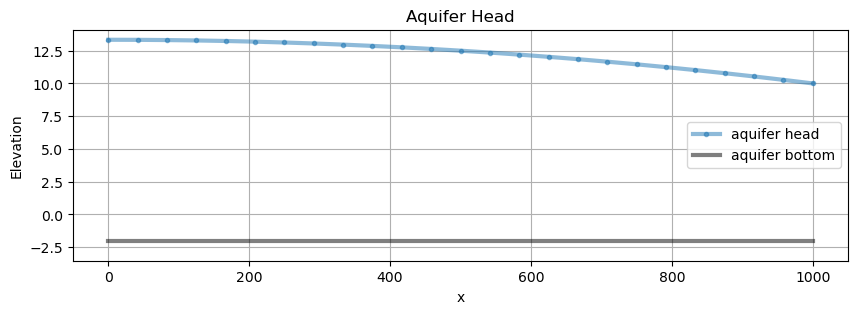

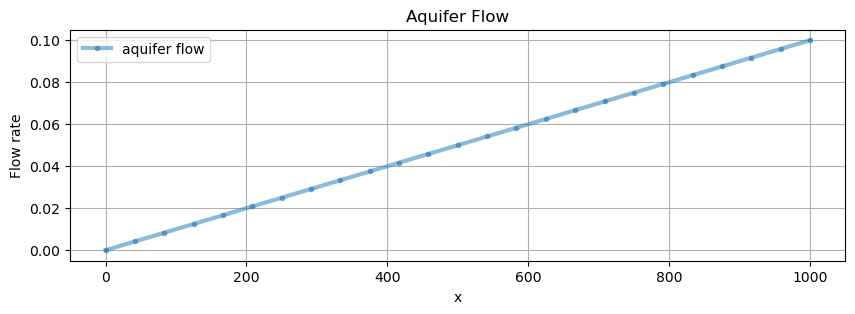

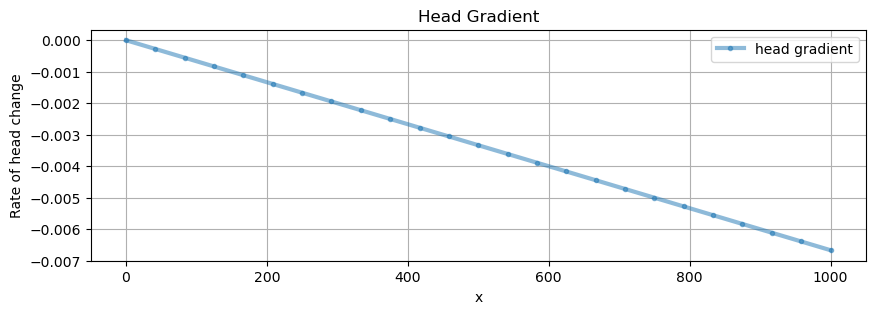

,x,h
0,0.000000,13.333333
1,41.666667,13.327546
2,83.333333,13.310185
3,125.000000,13.281250
4,166.666667,13.240741
5,208.333333,13.188657
6,250.000000,13.125000
7,291.666667,13.049769
8,333.333333,12.962963
9,375.000000,12.864583


In [13]:
S2 = pygaf.Steady1dConfFlow()
S2.aq.K = 1.5
S2.aq.bot = -2.0
S2.R = 0.0001
S2.info()
S2.aq.info()
dum = S2.h()
dum = S2.q()
dum = S2.h_grad()
S2.h(plot=False)

### Solution for inflow at x=0, head at x=L and uniform recharge

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, confined homogeneous aquifer
Boundary value solution for flow equation T.d2h/dx2 + R = 0
BC at x=0: type 2, {'flow': 0.05}
BC at x=L: type 1, {'head': 10.0}
Recharge rate: 0.0001 [L/T]



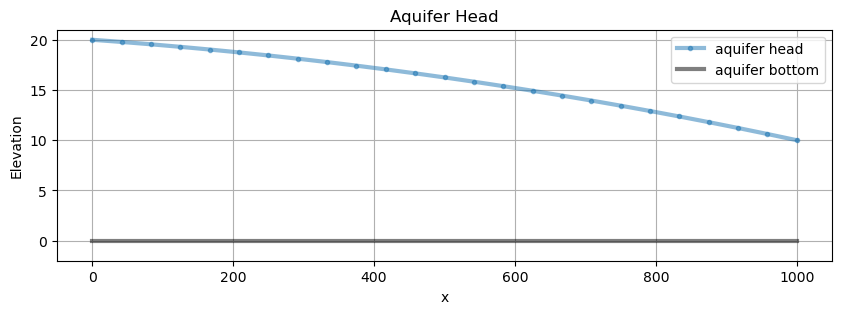

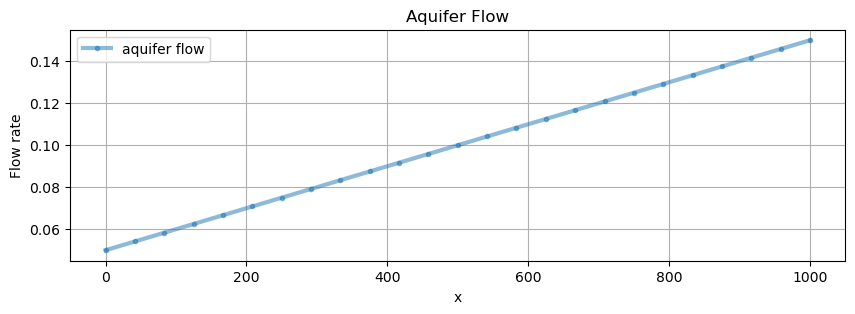

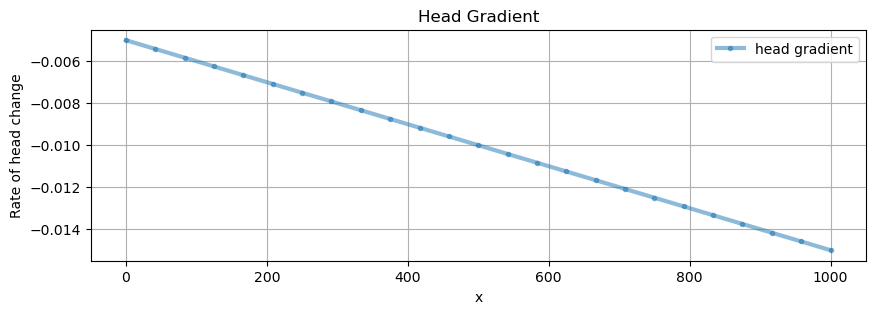

In [14]:
S3 = pygaf.Steady1dConfFlow()
S3.bc0.flow = 0.05
S3.R = 0.0001
S3.info()
dum = S3.h()
dum = S3.q()
dum = S3.h_grad()

### Solution for outflow at x=0, head at x=0 and uniform recharge
Outflow at x=0 is achieved by setting the boundary flow to a negative value since, by convention, flow is positive in the x direction.

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, confined homogeneous aquifer
Boundary value solution for flow equation T.d2h/dx2 + R = 0
BC at x=0: type 2, {'flow': -0.03}
BC at x=L: type 1, {'head': 10.0}
Recharge rate: 0.0001 [L/T]



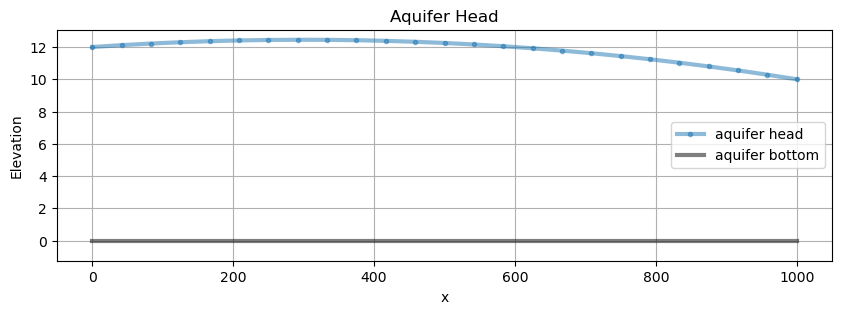

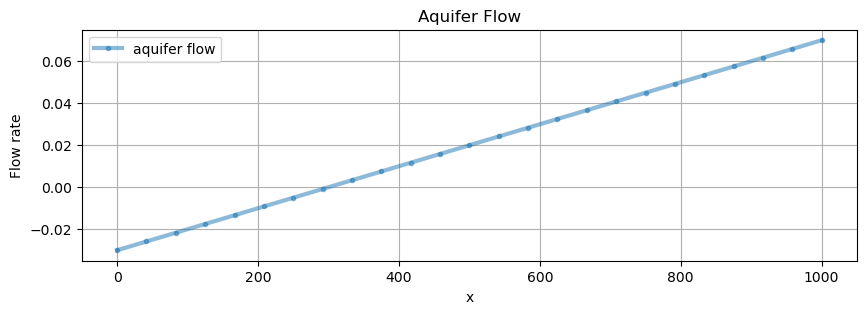

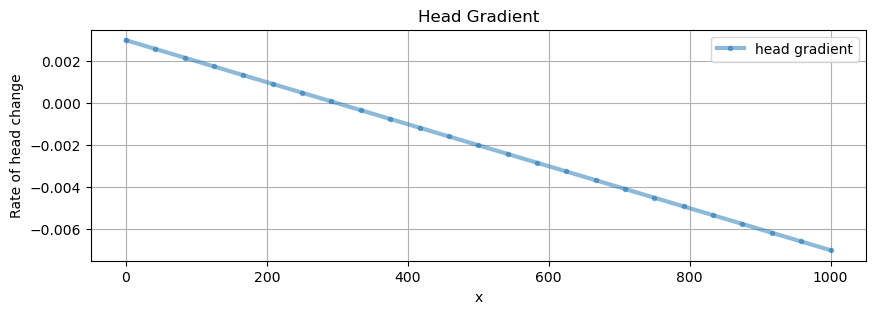

In [15]:
S4 = pygaf.Steady1dConfFlow()
S4.bc0.flow = -0.03
S4.R = 0.0001
S4.info()
dum = S4.h()
dum = S4.q()
dum = S4.h_grad()

### Solution for head at x=0, no-flow at x=L and uniform recharge
In this example, the boundary types need to be reset from the defaults.

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, confined homogeneous aquifer
Boundary value solution for flow equation T.d2h/dx2 + R = 0
BC at x=0: type 1, {'head': 10.0}
BC at x=L: type 2, {'flow': 0.0}
Recharge rate: 0.0001 [L/T]



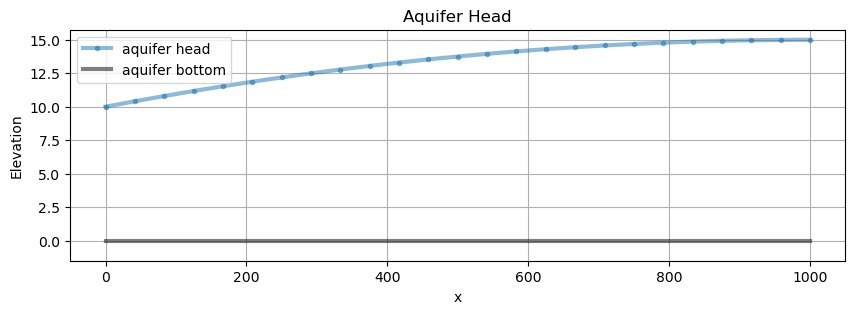

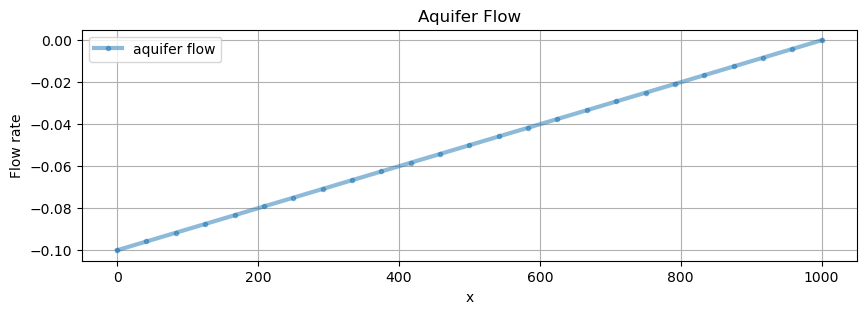

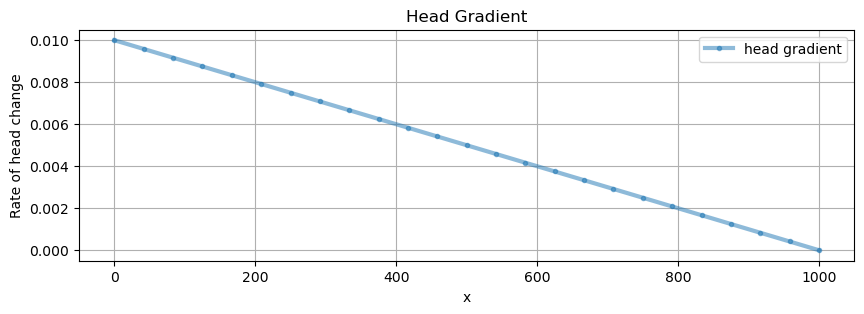

In [16]:
S5 = pygaf.Steady1dConfFlow()
S5.bc0.type = 1
S5.bcL.type = 2
S5.R = 0.0001
S5.info()
dum = S5.h()
dum = S5.q()
dum = S5.h_grad()

### Solution for head at x=0, inflow at x=L and uniform recharge
In this example, inflow at x=L is acheived by setting the boundary flow to a negative value since, by convention, flow is positive in the x direction.

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, confined homogeneous aquifer
Boundary value solution for flow equation T.d2h/dx2 + R = 0
BC at x=0: type 1, {'head': 10.0}
BC at x=L: type 2, {'flow': -0.05}
Recharge rate: 0.0001 [L/T]



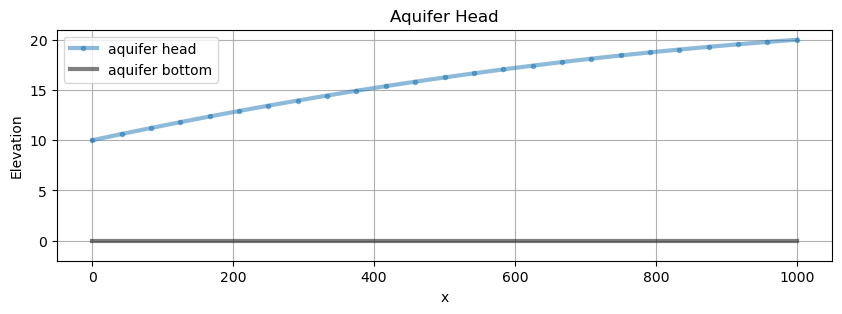

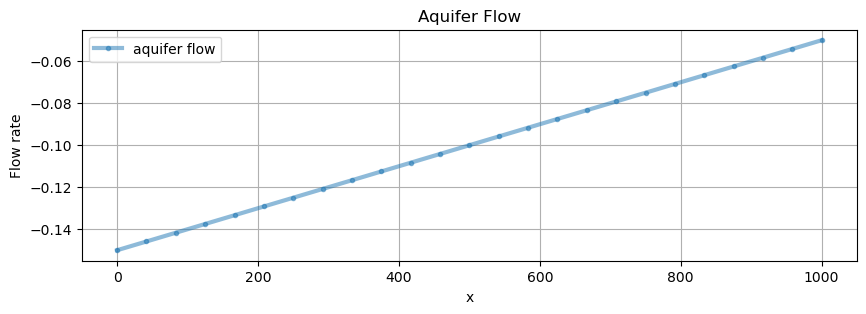

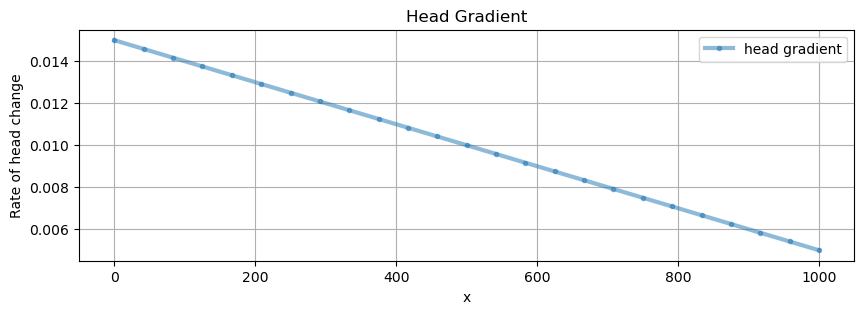

In [17]:
S6 = pygaf.Steady1dConfFlow()
S6.bc0.type = 1
S6.bcL.type = 2
S6.bcL.flow = -0.05
S6.R = 0.0001
S6.info()
dum = S6.h()
dum = S6.q()
dum = S6.h_grad()

### Solution for head at x=0, outflow at x=L and uniform recharge

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, confined homogeneous aquifer
Boundary value solution for flow equation T.d2h/dx2 + R = 0
BC at x=0: type 1, {'head': 10.0}
BC at x=L: type 2, {'flow': 0.03}
Recharge rate: 0.0001 [L/T]



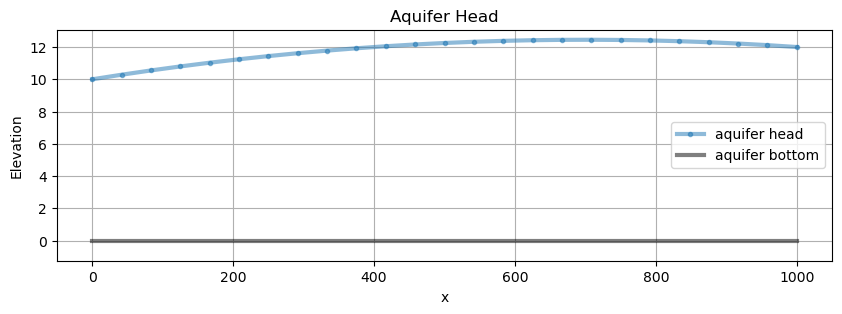

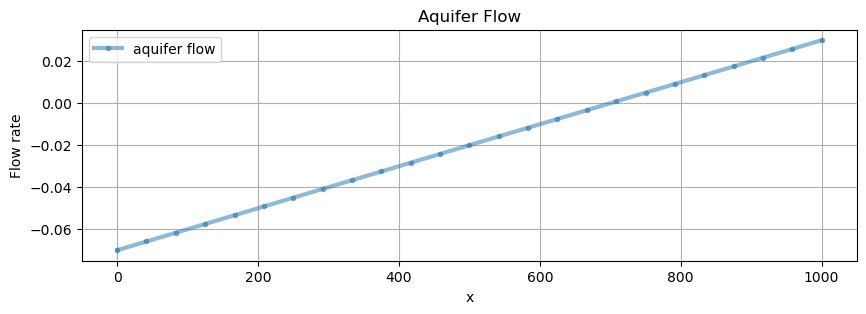

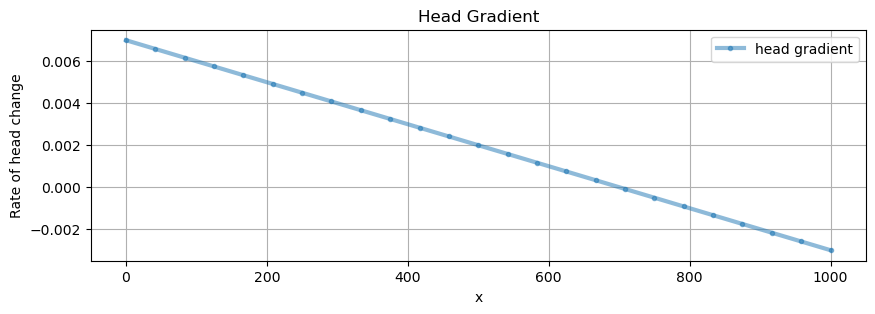

In [18]:
S7 = pygaf.Steady1dConfFlow()
S7.bc0.type = 1
S7.bcL.type = 2
S7.bcL.flow = 0.03
S7.R = 0.0001
S7.info()
dum = S7.h()
dum = S7.q()
dum = S7.h_grad()

### Solution for head at x=0, head at x=L and uniform recharge

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, confined homogeneous aquifer
Boundary value solution for flow equation T.d2h/dx2 + R = 0
BC at x=0: type 1, {'head': 15}
BC at x=L: type 1, {'head': 10.0}
Recharge rate: 0.0005 [L/T]



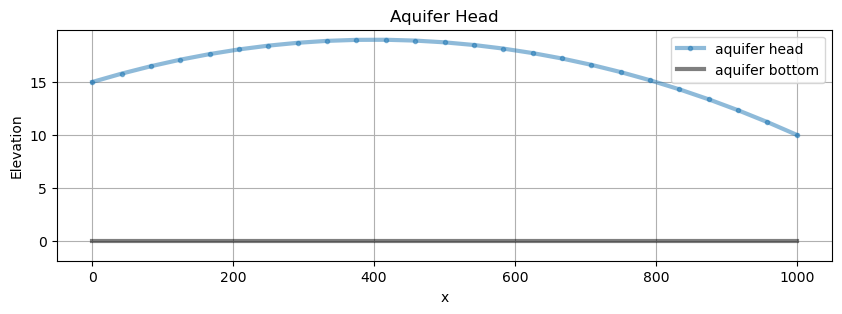

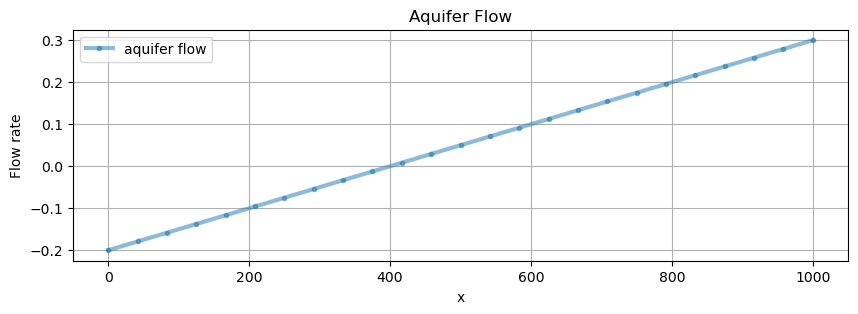

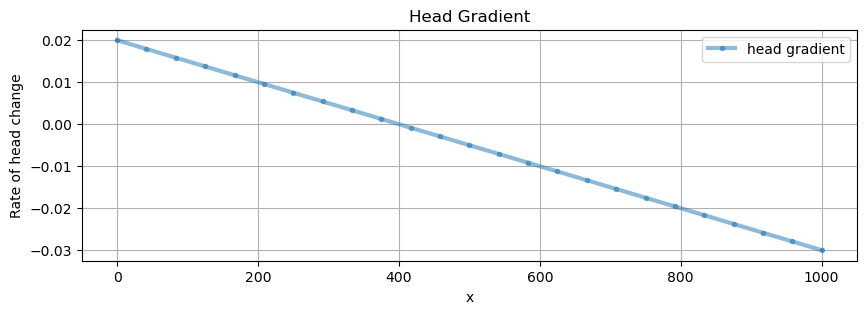

In [19]:
S8 = pygaf.Steady1dConfFlow()
S8.bc0.type = 1
S8.bcL.type = 1
S8.bc0.head = 15
S8.R = 0.0005
S8.info()
dum = S8.h()
dum = S8.q()
dum = S8.h_grad()

## Unconfined Flow
The default `Steady1dUnconfFlow` object uses the default `Aq1dFiniteUnconf` aquifer class, default `SteadyBC` type 2 boundary condition class at x=0 and default `SteadyBC` type 1 boundary condition class at x=L.

Create a default steady state, 1D unconfined aquifer flow solution and display the default solution information. Calculate the solutions for head, flow and hydraulic gradient using the `.h`, `.q` and `.h_grad` methods
- Plots are drawn as default but can be suppressed using the plot argument (e.g., `.h(plot=False)`)
- Results can be exported to csv or xlsx by setting these arguments to a file name (e.g., `.h(csv='fname'`) or `.h(xlsx='fname'`). If neither of these arguments are given then result are not exported.

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, unconfined homogeneous aquifer
Boundary value solution for flow equation d(K.h.dh/dx)/dx + R = 0
BC at x=0: type 2, {'flow': 0.0}
BC at x=L: type 1, {'head': 10.0}
Recharge rate: 0.0 [L/T]



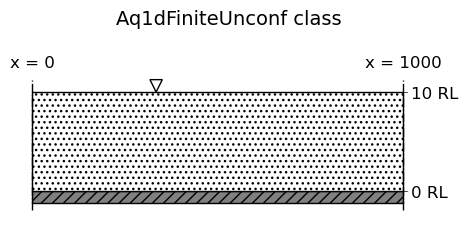

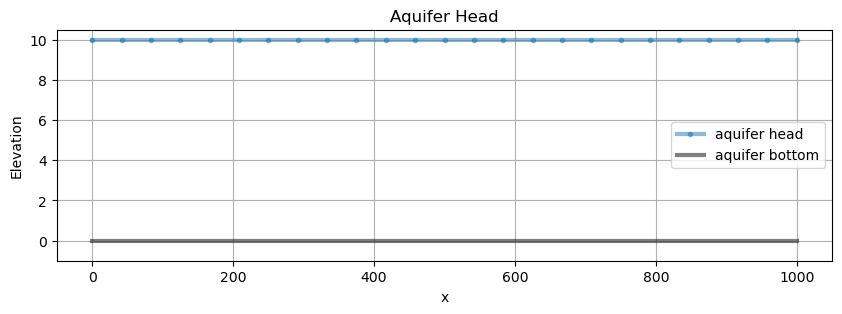

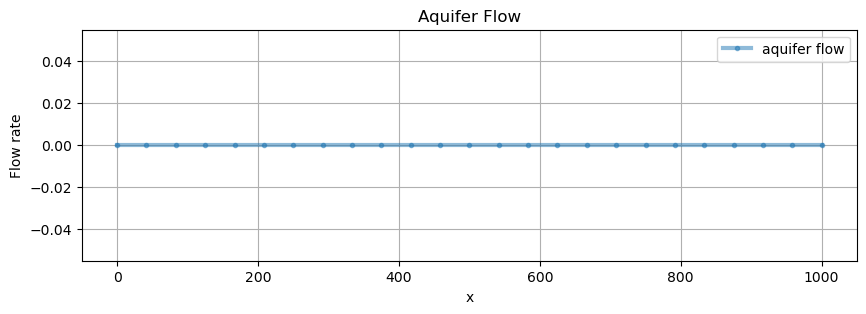

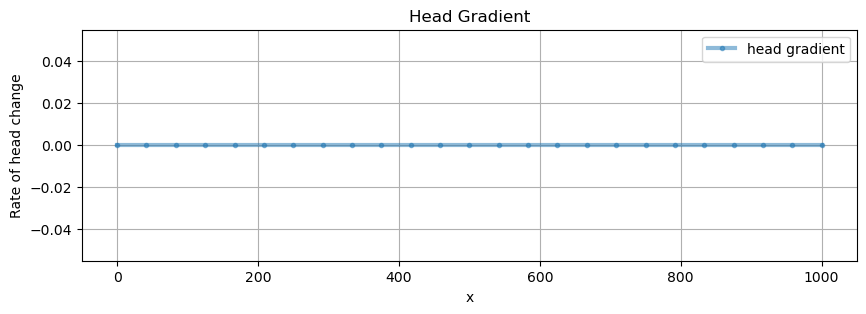

In [20]:
S9 = pygaf.Steady1dUnconfFlow()
S9.info()
S9.aq.draw()
dum = S9.h()
dum = S9.q()
dum = S9.h_grad()

### Solution for no-flow at x=0, head at x=L and uniform recharge

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, unconfined homogeneous aquifer
Boundary value solution for flow equation d(K.h.dh/dx)/dx + R = 0
BC at x=0: type 2, {'flow': 0.0}
BC at x=L: type 1, {'head': 10.0}
Recharge rate: 0.0001 [L/T]

AQUIFER INFORMATION
-------------------
Type: 1D, finite, unconfined homogeneous aquifer
Name: Aq1dFiniteUnconf class
Hydraulic conductivity: 1.5 [L/T]
Specific yield: 0.1 [1]
Static saturated thickness: 10 [L]
Length: 1000 [L]
Static transmissivity: 15.0 [L2/T]
Bottom elevation: -2 [RL]
Static water table: 8 [RL]



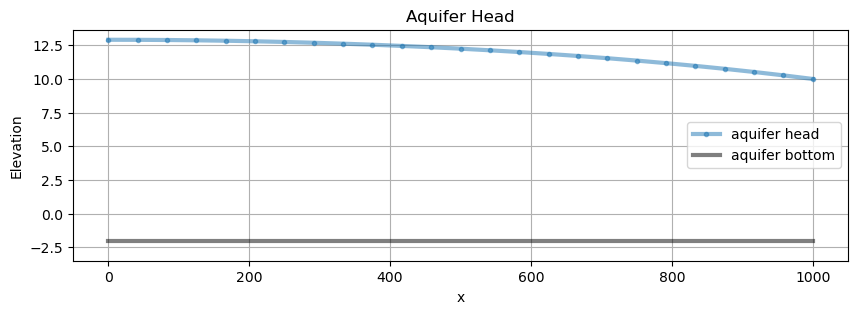

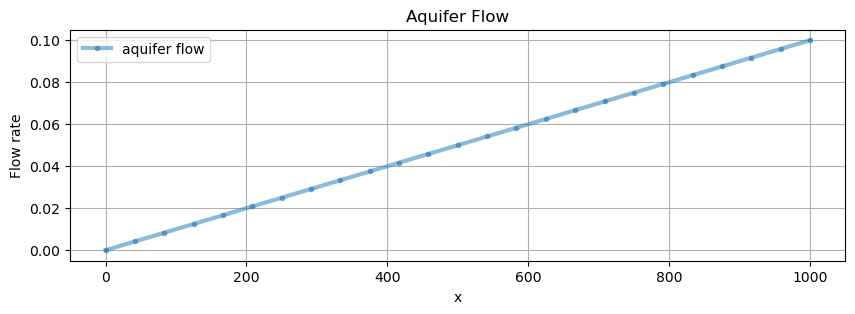

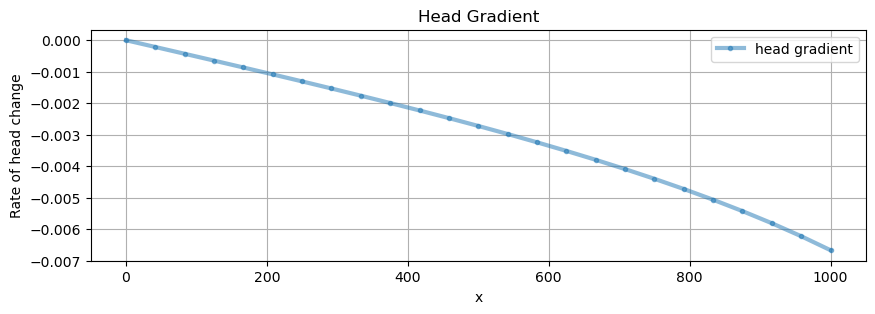

In [23]:
S10 = pygaf.Steady1dUnconfFlow()
S10.aq.K = 1.5
S10.aq.bot = -2
S10.R = 0.0001
S10.info()
S10.aq.info()
dum = S10.h()
dum = S10.q()
dum = S10.h_grad()

### Solution for inflow at x=0, head at x=L and uniform recharge

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, unconfined homogeneous aquifer
Boundary value solution for flow equation d(K.h.dh/dx)/dx + R = 0
BC at x=0: type 2, {'flow': 0.05}
BC at x=L: type 1, {'head': 10.0}
Recharge rate: 0.0001 [L/T]



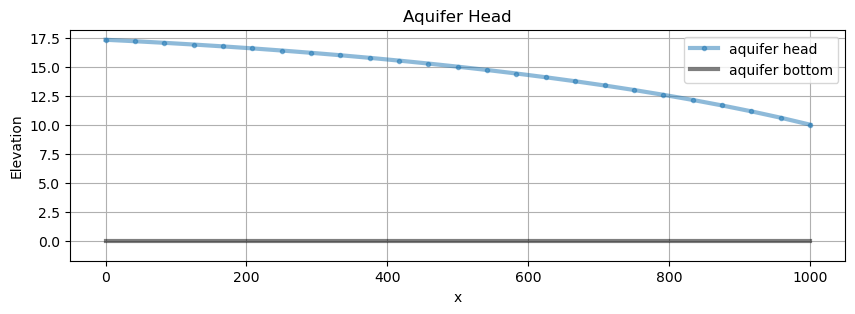

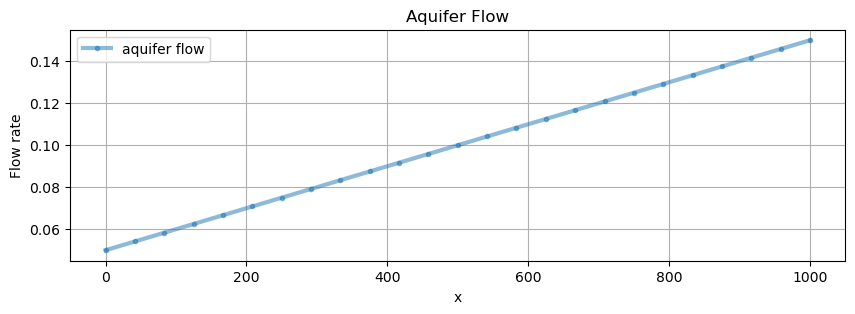

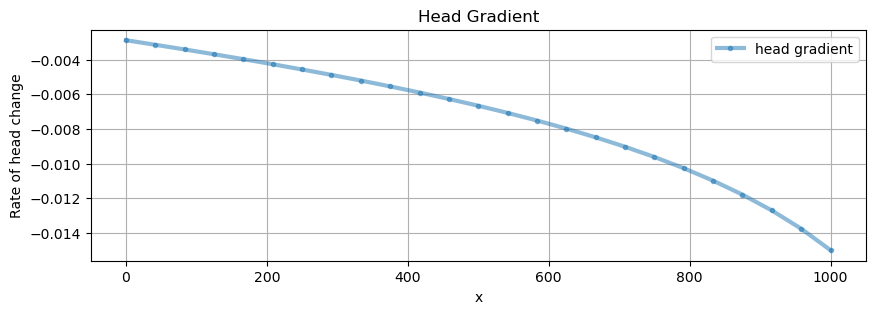

In [24]:
S11 = pygaf.Steady1dUnconfFlow()
S11.bc0.flow = 0.05
S11.R = 0.0001
S11.info()
dum = S11.h()
dum = S11.q()
dum = S11.h_grad()

### Solution for outflow at x=0, head at x=L and uniform recharge
Outflow at x=0 is achieved by setting the boundary flow to a negative value.

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, unconfined homogeneous aquifer
Boundary value solution for flow equation d(K.h.dh/dx)/dx + R = 0
BC at x=0: type 2, {'flow': -0.03}
BC at x=L: type 1, {'head': 10.0}
Recharge rate: 0.0001 [L/T]



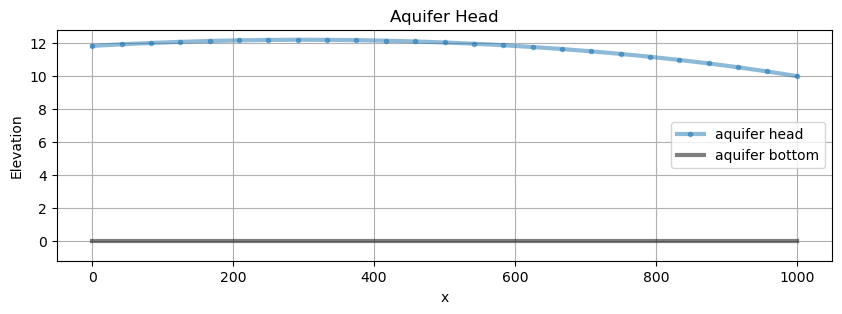

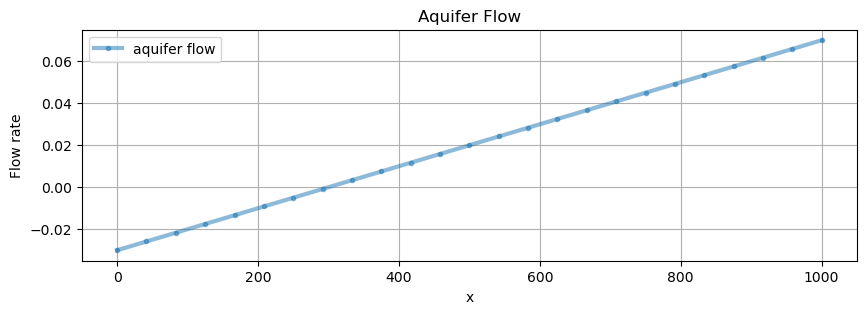

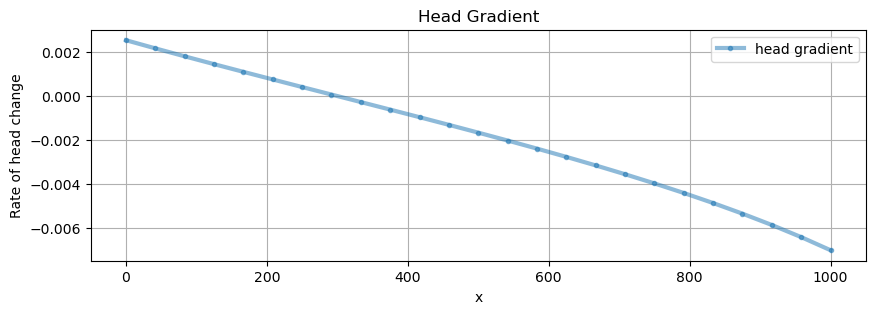

In [25]:
S12 = pygaf.Steady1dUnconfFlow()
S12.bc0.flow = -0.03
S12.R = 0.0001
S12.info()
dum = S12.h()
dum = S12.q()
dum = S12.h_grad()

### Solution for head at x=0, no-flow at x=L and uniform recharge

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, unconfined homogeneous aquifer
Boundary value solution for flow equation d(K.h.dh/dx)/dx + R = 0
BC at x=0: type 1, {'head': 10.0}
BC at x=L: type 2, {'flow': 0.0}
Recharge rate: 0.0001 [L/T]



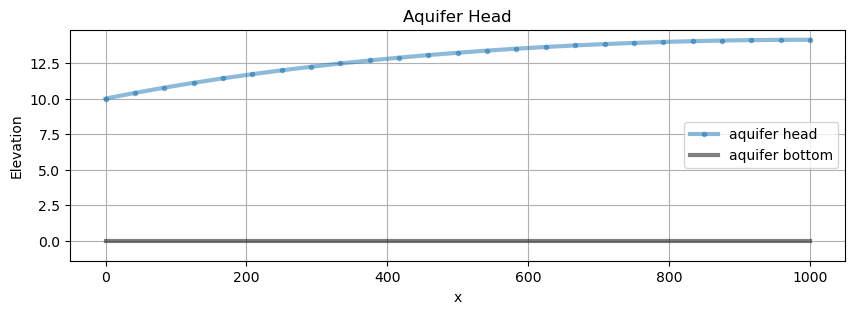

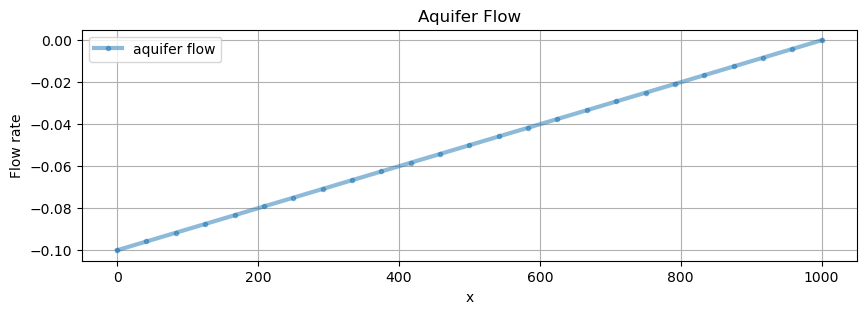

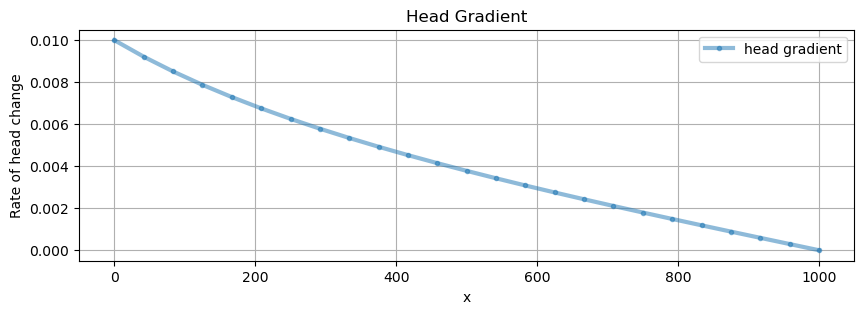

In [26]:
S13 = pygaf.Steady1dUnconfFlow()
S13.bc0.type = 1
S13.bcL.type = 2
S13.R = 0.0001
S13.info()
dum = S13.h()
dum = S13.q()
dum = S13.h_grad()

### Solution for head at x=0, inflow at x=L  and uniform recharge
Inflow at x=L is achieved by setting the boundary flow to a negative value.

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, unconfined homogeneous aquifer
Boundary value solution for flow equation d(K.h.dh/dx)/dx + R = 0
BC at x=0: type 1, {'head': 10.0}
BC at x=L: type 2, {'flow': -0.05}
Recharge rate: 0.0001 [L/T]



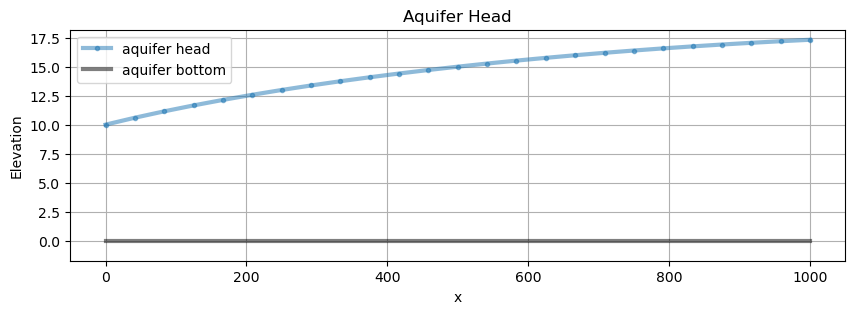

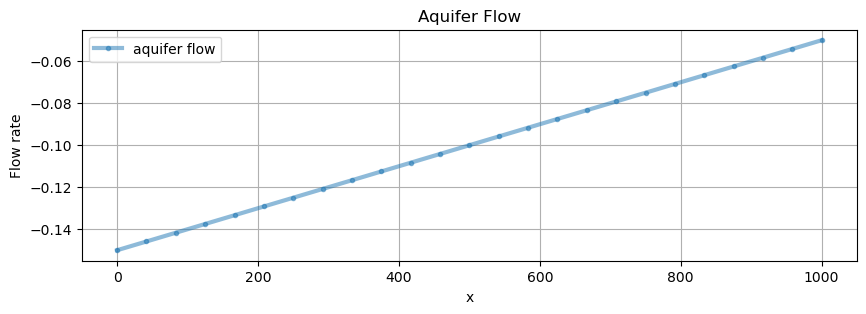

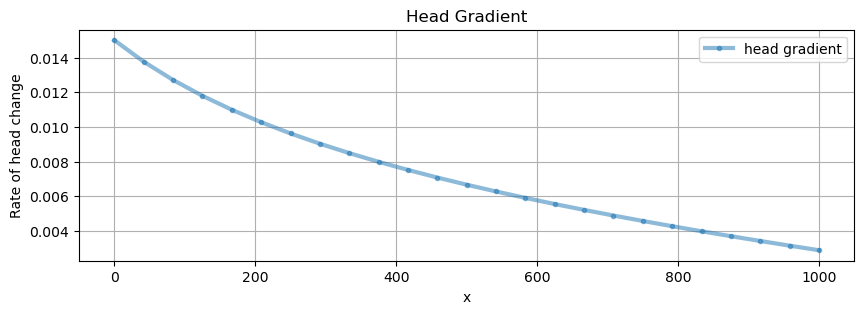

In [27]:
S14 = pygaf.Steady1dUnconfFlow()
S14.bc0.type = 1
S14.bcL.type = 2
S14.bcL.flow = -0.05
S14.R = 0.0001
S14.info()
dum = S14.h()
dum = S14.q()
dum = S14.h_grad()

### Solution for head at x=0, outflow at x=L and uniform recharge

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, unconfined homogeneous aquifer
Boundary value solution for flow equation d(K.h.dh/dx)/dx + R = 0
BC at x=0: type 1, {'head': 10.0}
BC at x=L: type 2, {'flow': 0.03}
Recharge rate: 0.0001 [L/T]



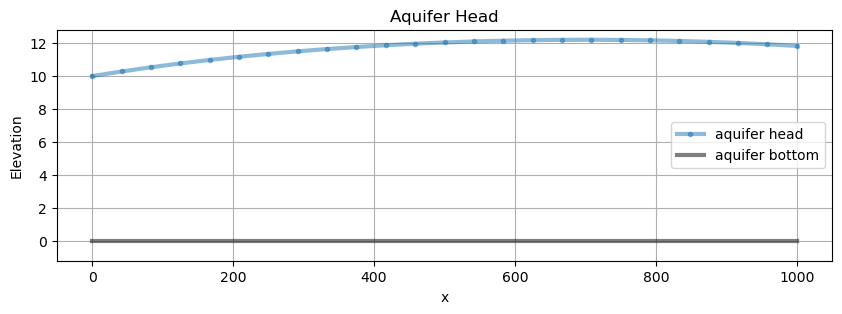

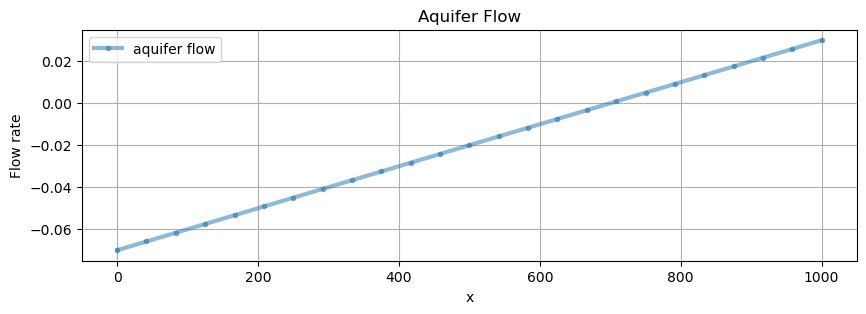

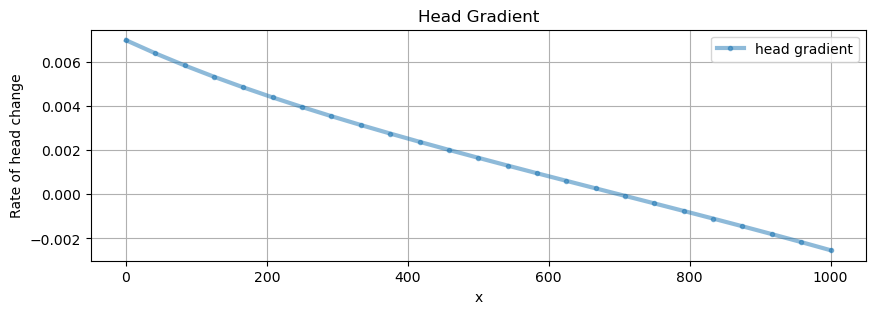

In [28]:
S15 = pygaf.Steady1dUnconfFlow()
S15.bc0.type = 1
S15.bcL.type = 2
S15.bcL.flow = 0.03
S15.R = 0.0001
S15.info()
dum = S15.h()
dum = S15.q()
dum = S15.h_grad()

### Solution for head at x=0, head at x=L and uniform recharge

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, unconfined homogeneous aquifer
Boundary value solution for flow equation d(K.h.dh/dx)/dx + R = 0
BC at x=0: type 1, {'head': 15}
BC at x=L: type 1, {'head': 10.0}
Recharge rate: 0.0005 [L/T]



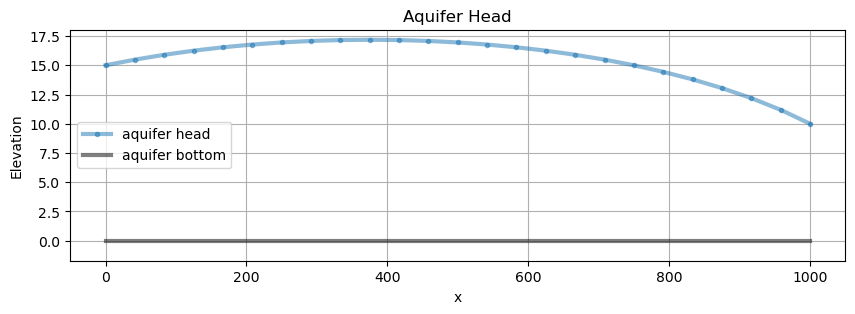

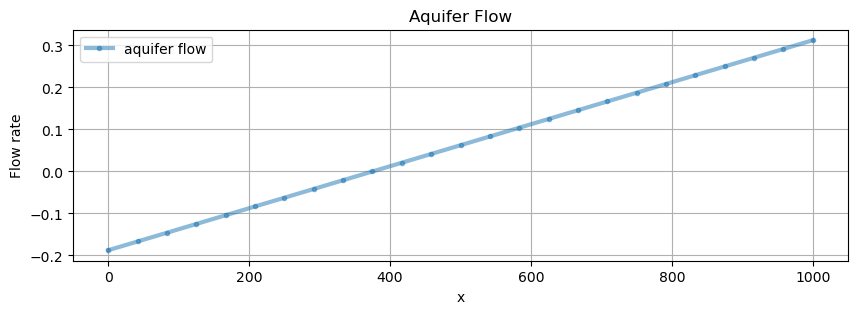

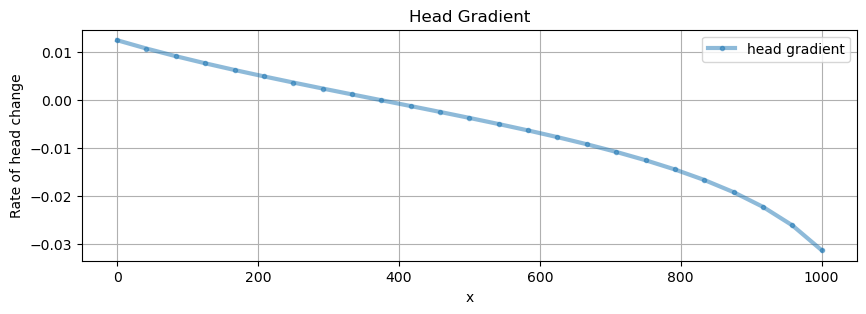

In [29]:
S16 = pygaf.Steady1dUnconfFlow()
S16.bc0.type = 1
S16.bcL.type = 1
S16.bc0.head = 15
S16.R = 0.0005
S16.info()
dum = S16.h()
dum = S16.q()
dum = S16.h_grad()

### Solution for head at x=0, head at x=L and uniform discharge
Uniform discharge is acheived by setting recharge to a negative value

FLOW SOLUTION INFORMATION
-------------------------
Flow in 1D, finite, unconfined homogeneous aquifer
Boundary value solution for flow equation d(K.h.dh/dx)/dx + R = 0
BC at x=0: type 1, {'head': 12}
BC at x=L: type 1, {'head': 10.0}
Recharge rate: -0.0002 [L/T]



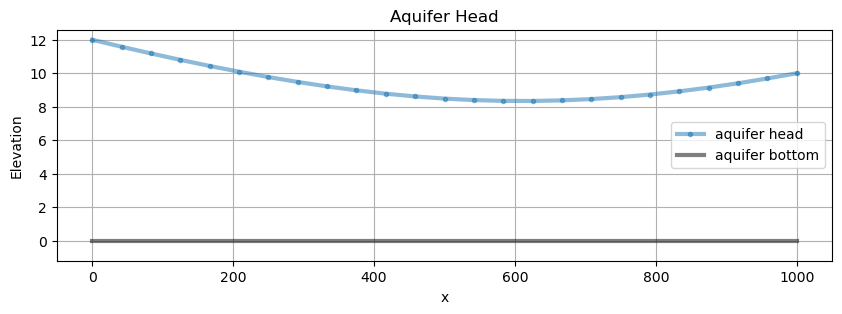

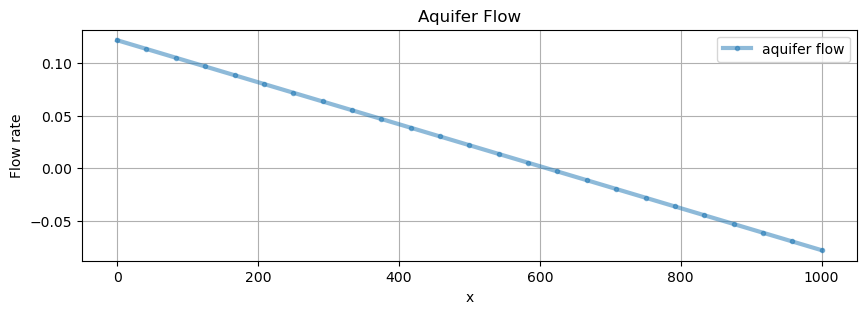

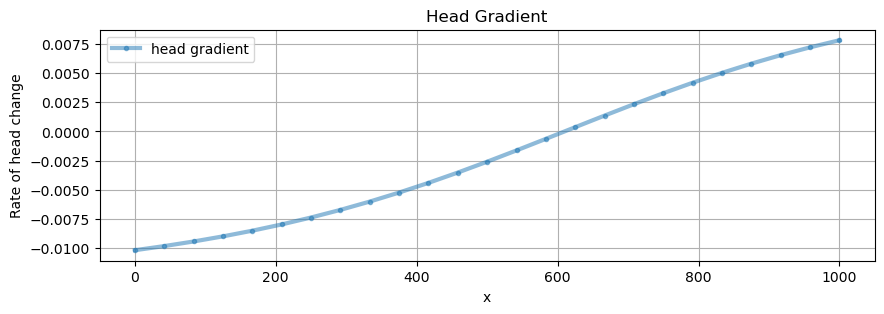

In [30]:
S17 = pygaf.Steady1dUnconfFlow()
S17.bc0.type = 1
S17.bcL.type = 1
S17.bc0.head = 12
S17.R = -0.0002
S17.info()
dum = S17.h()
dum = S17.q()
dum = S17.h_grad()